# Facial Expression Recognition Using SVM


## Imports

In [1]:
import random
import glob
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.filters import gabor
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras.utils import to_categorical

## Data Read

In [2]:
# Define a function to compute LBP features for a given image
def compute_lbp(image, num_points=8, radius=1, method='uniform'):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, num_points, radius, method=method)
    return lbp.flatten()

In [3]:
def compute_gabor(image):
    # Convert the image to grayscale
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Define Gabor filter parameters
    frequency = 0.6
    theta = 1.0
    sigma_x = 2.0
    sigma_y = 2.0

    # Apply Gabor filter
    gabor_features, _ = gabor(image, frequency=frequency, theta=theta, sigma_x=sigma_x, sigma_y=sigma_y)

    # Flatten the Gabor features to a 1D array
    gabor_features = gabor_features.flatten()

    return gabor_features

# Confusion Matrix:
# [[1 0 9]
#  [1 0 9]
#  [2 0 8]]

# Accuracy: 0.30
# Precision: 0.19
# Recall: 0.30
# F1 Score: 0.20

In [4]:
train_path = "../../Datasets/Emotion_Datasets/our_dataset/detected faces/train detected faces for each emotion/preprocessed/"

# Create a mapping from string train_labels (emotions) to class numbers
emotion_to_class = {'disgust': 0, 'anger': 1, 'happiness': 2}

# Initialize a set to store unique image labels
unique_labels = set()

# Initialize a list to store image data as tuples
train_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(train_path):
    folder_path = os.path.join(train_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            if emotion_label == 'sadness':
                continue
            if emotion_label == 'surprise':
                continue
            if emotion_label == 'fear':
                continue
            if emotion_label == 'neutral':
                continue

            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Compute LBP features
                lbp_features = compute_lbp(image)
                # gabor_Features = compute_gabor(image)

                # Store image and label as a tuple in the list
                train_image_data.append((lbp_features, class_number))
                
random.shuffle(train_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(train_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 77
Number of unique image labels: 3


In [5]:
test_path = "../../Datasets/Emotion_Datasets/our_dataset/detected faces/test detected faces for each emotion/preprocessed/"

# Initialize a list to store image data as tuples
test_image_data = []

# Loop through the subfolders
for folder_name in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder_name)
    if os.path.isdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, '*.jpg'))  # Modify the extension pattern if needed

        for image_path in image_files:
            # Extract emotion label from the folder name
            emotion_label = folder_name.lower()  # Assuming folder name represents the emotion label

            if emotion_label == 'sadness':
                continue
            if emotion_label == 'surprise':
                continue
            if emotion_label == 'fear':
                continue
            if emotion_label == 'neutral':
                continue

            # Convert the emotion label to class number using the mapping
            class_number = emotion_to_class.get(emotion_label, -1)  # -1 as a default value if the label is not in the mapping

            if class_number != -1:  # Consider only valid class numbers
                unique_labels.add(class_number)  # Add the class number to the set of unique labels

                # Read the image
                image = cv2.imread(image_path)

                # Compute LBP features
                lbp_features = compute_lbp(image)
                # gabor_Features = compute_gabor(image)

                # Store image and label as a tuple in the list
                test_image_data.append((lbp_features, class_number))
                
random.shuffle(test_image_data)
# Display the total number of collected images and the number of unique image labels
print("Total images collected:", len(test_image_data))
print("Number of unique image labels:", len(unique_labels))

Total images collected: 30
Number of unique image labels: 3


## SVM Model

In [6]:
X_train = np.array([data[0] for data in train_image_data])
train_labels = np.array([data[1] for data in train_image_data])
# Check unique labels and label encoding
unique_labels_adjusted = set(train_labels)
print("Unique Labels:", unique_labels_adjusted)
y_train = to_categorical(train_labels, num_classes=3)

X_test = np.array([data[0] for data in test_image_data])
test_labels = np.array([data[1] for data in test_image_data])
y_test = to_categorical(test_labels, num_classes=3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

le = LabelEncoder()
y_train = le.fit_transform(y_train.argmax(axis=1))
y_test = le.transform(y_test.argmax(axis=1))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# print(f"X_Train = {X_train}")
# print(f"Y_Train = {y_train}")
# print(f"X_Test = {X_test}")
# print(f"Y_Test = {y_test}")

Unique Labels: {0, 1, 2}
(77, 16384)
(30, 16384)
(77, 3)
(30, 3)
(77, 16384)
(30, 16384)
(77,)
(30,)


In [7]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',probability=True) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(f"Prediction: {y_pred}")

Prediction: [2 1 0 2 0 2 2 0 0 0 0 2 2 0 0 0 2 2 0 0 0 2 0 1 2 2 2 0 2 2]


## Results

In [8]:
# Step 4: Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Step 5: Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

Confusion Matrix:
[[6 1 3]
 [5 1 4]
 [3 0 7]]

Accuracy: 0.47
Precision: 0.48
Recall: 0.47
F1 Score: 0.42


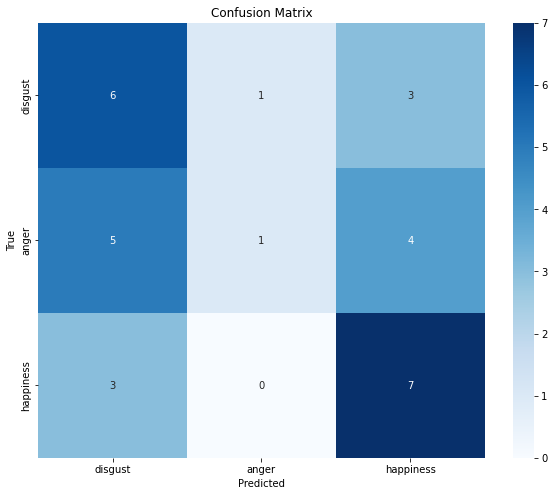

In [9]:
# Create a mapping from string labels (emotions) to class numbers
emotion_to_class = {'disgust': 0, 'anger': 1, 'happiness': 2}

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=emotion_to_class.keys(), yticklabels=emotion_to_class.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Validation

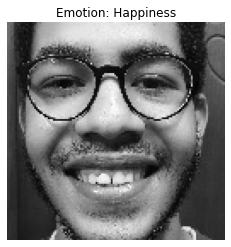

Input Data Shape: (1, 16384)
Class Probabilities: [[3.33333406e-14 1.66666703e-14 1.00000000e+00]]
2
Predicted Emotion: happiness


In [10]:
# Load and preprocess a new image for testing
val_image_path = '../../Datasets/Emotion_Datasets/our_dataset/detected faces/validation detected faces for each emotion/preprocessed/happiness/497226.jpg_face.jpg'  # Replace with the path to your test image

# Read the image
val_image = cv2.imread(val_image_path,cv2.COLOR_BGR2GRAY)

# Plot the image
plt.imshow(cv2.cvtColor(val_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
plt.title("Emotion: Happiness")
plt.axis('off')  # Turn off axis labels
plt.show()

val_data = np.array(val_image)

# Expand dimensions to match the model's expected input shape (add batch dimension)
val_data = np.expand_dims(val_data, axis=0)

val_data = val_data.reshape(val_data.shape[0],-1)

# Print the shape of the input data
print("Input Data Shape:", val_data.shape)

# Make probability predictions
class_probabilities = clf.predict_proba(val_data)

# Print class probabilities
print("Class Probabilities:", class_probabilities)

# Get the predicted class for each sample
predicted_class = np.argmax(class_probabilities, axis=1).item()

print(predicted_class)

# Map the predicted class index to the corresponding emotion label
emotion_labels = {0: 'disgust', 1: 'anger', 2: 'happiness'}
predicted_emotion = emotion_labels[predicted_class]

# Print the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')

